<a href="https://colab.research.google.com/github/ananyatiwari2709/Mini-Project/blob/main/Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mask detection using machine learning.

In [ ]:
# Data Gathering
# Data : Images - Using python library.

In [ ]:
!mkdir images

In [ ]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
downloader.download("person with covid-19 prevention mask on",limit=100,output_dir="images",adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("person",limit=100,output_dir="images",adult_filter_off=True)

In [ ]:
# Preprocessing
# 1.resizing
# 2.flattening

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['No Mask', 'Mask On']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label encoding the values
  path = os.path.join(DATADIR,category) # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)    
    
 

In [ ]:
flat_data[0]

In [ ]:
target

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# split data into Traning and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C' :[1,10,100,1000],'kernel':['linear']},
             {'C' :[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}       
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
# save the model using pickle library
import pickle
pickle.dump(clf,open('image_model.p','wb'))

In [ ]:
model = pickle.load(open('image_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFD2FHdOqLcMYYPov6hBGPG3NrGh7tbSPywg&usqp=CAU
(168, 300, 3)
PREDICTED OUTPUT:Mask On


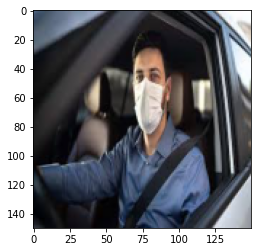

In [ ]:
#testing a brand new image 
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{ y_out}')